In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

C:\Users\Giulia\AppData\Local\Temp\ipykernel_19992\673120910.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#name,sex,ticket,cabin,embarked sono categorical attributes
#devo trovare un modo di trasformarli in numerical

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#inoltre Age,Cabin e Embarked hanno dei missing values

In [8]:
## trasformo i categorical in numerical
#Sex e Embarked

#invece Name, Ticket e Cabin non li fa perche li elimina


In [9]:
#sex 

In [10]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)

#ho aggiunto un attributo chiamato Sex_Val con i valori di Sex trasformati in numerici

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_Val          int32
dtype: object

In [12]:
df['Sex_Val'].unique()
#1 = maschio, 0=femmina

array([1, 0])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
#embarked

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
embarked_locs = sorted(df['Embarked'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
df['Embarked_Val'] = df['Embarked'].map(embarked_locs_mapping).astype(int)

#ho aggiunto un attributo con i valori di Embarked trasformati in numerici

In [16]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Sex_Val           int32
Embarked_Val      int32
dtype: object

In [17]:
df['Embarked_Val'].unique()
#0= C, 1= Q, 2= S

array([2, 0, 1])

In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,1


In [19]:
#Age,Cabin e Embarked hanno dei missing values
#Cabin lo elimina

In [20]:
#Age

In [21]:
#creo un nuovo attributo Age Fill 

In [22]:
df['AgeFill'] = df['Age']
df['AgeFill'] = df['AgeFill'].groupby([df['Sex_Val'], df['Pclass']]).apply(lambda x: x.fillna(x.median()))

#non ho capito in base a cosa ha creato questo nuovo attributi AgeFill riempiendo i Nan con?

In [23]:
df['AgeFill'].isnull().sum()

0

In [24]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,AgeFill
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,2,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,2,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,2,21.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,0,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,1,32.0


In [25]:
#con Embarked non sta a riempire i nan perche tanto lo elimina

In [26]:
## inoltre creo un nuovo attributo FamilySize che è la somma di Sibsp e Parch

In [27]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [28]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Sex_Val           int32
Embarked_Val      int32
AgeFill         float64
FamilySize        int64
dtype: object

In [29]:
#controllo quali attributi categorici mi sono rimasti 

In [30]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [31]:
#e li elimino
#inoltre elimino anche altri attrbuti non so in base a cosa

df_train = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train = df_train.drop(['Survived', 'Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val', 'Sex_Val'], axis=1)
df_train.dtypes

Pclass          int64
Fare          float64
AgeFill       float64
FamilySize      int64
dtype: object

In [32]:
df_train.shape
#rimango con 4 attributi per fare il clustering 

(891, 4)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Fare        891 non-null    float64
 2   AgeFill     891 non-null    float64
 3   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [34]:
#nessuno è categorico e nessuno ha dei Nan
#ok posso fare il clustering

In [35]:
df_train.columns

Index(['Pclass', 'Fare', 'AgeFill', 'FamilySize'], dtype='object')

In [36]:
#ma prima devo normalizzare 

In [37]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_train)

In [38]:
df_train.head()

,Pclass,Fare,AgeFill,FamilySize
0,3,7.2500,22.0,1
1,1,71.2833,38.0,1
2,3,7.9250,26.0,0
3,1,53.1000,35.0,1
4,3,8.0500,35.0,0


### Clustering

In [39]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

### K-means
è un partitional clustering quindi ogni record viene assegnato esattamente ad un clustering
k = il numero di clustering (numero di centroid) che vogliamo ottenere e viene dato come input
- ogni cluster ha un **centroid** che rappresenta si il centro di quel cluster
- ogni punto viene assegnato al cluster del centroid piu vicino ( la distanza è calcolata con la Euclidean distance = in uno spazio multidimensionale con più attributi, l'equazione generale per calcolare la distanza euclidea tra due punti (vettori) sommatoria del quadrato delle distanze per ogni attributo.)

- alla prima iterazione i centroid vengono scelti random e si crea il primo gruppo di clusters
- alla seconda iterazione questi centroids vengono ricalcolati (come il centro di ogni cluster) in base ai cluster a cui appartengono cosi otteniamo dei nuovi centroids che saranno piu centrali nel clusters rispetto ai centroids precedenti
- ... le iterazioni vanno avanti finchè i centroids non cambiano piu 

In [40]:
%%time
sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))
    
#calcola tutte le possibile SSE e tutte le Silhuette

Wall time: 7.59 s


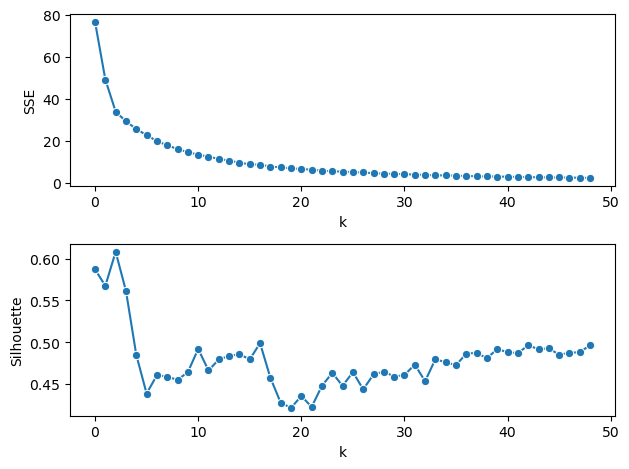

In [41]:
fig, axs = plt.subplots(2) # 1 row, 2 columns

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots

#dal primo grafico mi sembra che il k migliore sia k=3 perche il "gomito" è fra 2 e 3
#da li in poi la SSE continua a scendere(a migliorare) all'aumentare di k ma rallenta

**silhuette**
la silhouette misura quanto un oggetto è simile al proprio cluster rispetto agli altri cluster. 
Questo valore può variare da -1 a 1 e viene calcolato per ciascun oggetto. 
Valori elevati indicano una migliore assegnazione dell'oggetto al cluster corretto

grafico:
mostra il valore medio complessivo della silhouette in funzione del numero di cluster utilizzati nell'algoritmo.

 L'obiettivo è trovare il numero ottimale di cluster che massimizza la silhouette media. In altre parole, si cerca il punto nel grafico dove il valore della silhouette è massimo.

In [ ]:
#anche dal secondo grafico sembra che il numero ottimale di cluster sia k=3

#ma non ho capito perchè poi usa k=5

In [42]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, max_iter=100)
kmeans.fit(train_data)

KMeans(max_iter=100, n_clusters=5)

In [43]:
print('labels', np.unique(kmeans.labels_, return_counts=True))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels (array([0, 1, 2, 3, 4]), array([433, 109, 184,  58, 107], dtype=int64))
sse 29.169529608291565
silhouette 0.5614640538880703


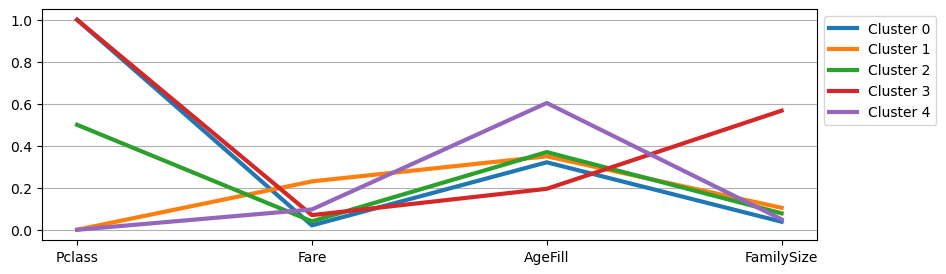

In [44]:
plt.figure(figsize=(10, 3))

for i in range(len(kmeans.cluster_centers_)):
    plt.plot(range(0, 4), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 4), list(df_train.columns))
plt.legend(bbox_to_anchor=(1,1))
plt.grid(axis='y')
plt.show()

In [45]:
df_clusters = df_train.copy()
df_clusters['Labels'] = kmeans.labels_

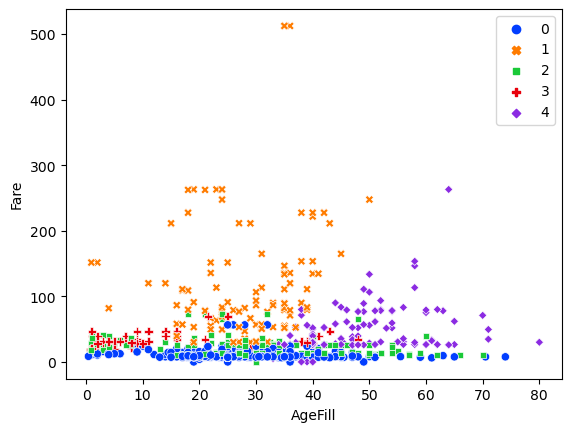

In [46]:
sns.scatterplot(data=df_clusters, 
                x="AgeFill",
                y="Fare", 
                hue=kmeans.labels_, 
                style=kmeans.labels_, 
                palette="bright")
plt.show()

In [47]:
df_clusters.head()

,Pclass,Fare,AgeFill,FamilySize,Labels
0,3,7.2500,22.0,1,0
1,1,71.2833,38.0,1,4
2,3,7.9250,26.0,0,0
3,1,53.1000,35.0,1,1
4,3,8.0500,35.0,0,0


In [48]:
pclass_xt = pd.crosstab(df_clusters['Pclass'], df_clusters['Labels'])
pclass_xt

Labels,0,1,2,3,4
Pclass,,,,,
1,0,109,0,0,107
2,0,0,184,0,0
3,433,0,0,58,0


In [49]:
psurv_xt = pd.crosstab(df_clusters['Labels'], df['Survived'])
psurv_xt

Survived,0,1
Labels,,
0,322,111
1,21,88
2,97,87
3,50,8
4,59,48


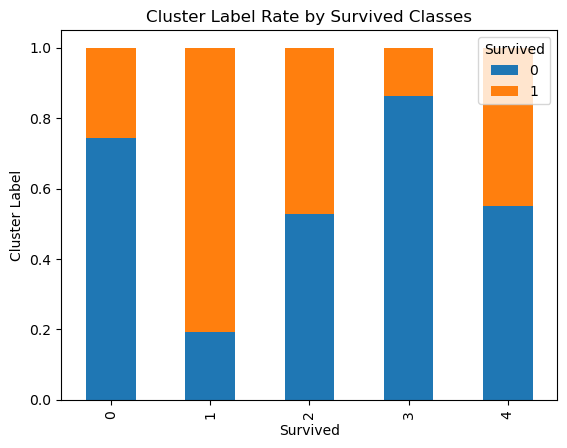

In [50]:
psurv_xt_pct = psurv_xt.div(psurv_xt.sum(1).astype(float), axis=0)
psurv_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Survived Classes')
plt.xlabel('Survived')
plt.ylabel('Cluster Label')
plt.show()

In [51]:
df_clusters[df_clusters['Labels']==1].describe()

,Pclass,Fare,AgeFill,FamilySize,Labels
count,109.0,109.000000,109.000000,109.000000,109.0
mean,1.0,118.044533,28.256147,1.045872,1.0
std,0.0,92.682510,9.034489,1.173672,0.0
min,1.0,26.283300,0.920000,0.000000,1.0
25%,1.0,56.929200,22.000000,0.000000,1.0
50%,1.0,86.500000,29.000000,1.000000,1.0
75%,1.0,146.520800,35.000000,1.000000,1.0
max,1.0,512.329200,50.000000,5.000000,1.0


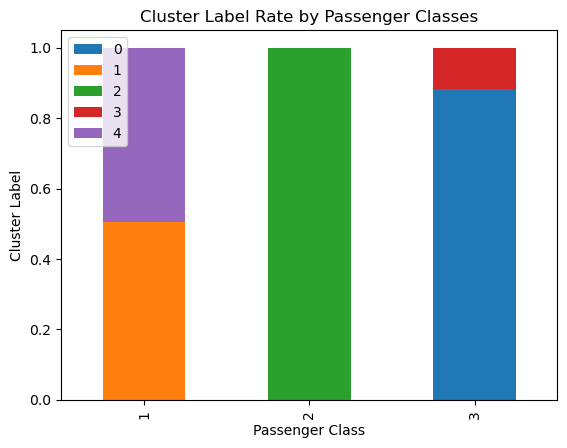

In [52]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Cluster Label')
plt.legend(loc='best')
plt.show()